<a href="https://colab.research.google.com/github/Nituhimani/Student_dropout_prediction/blob/main/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("dataset.csv")
#df.head()

In [3]:
df1=df.drop(df[df['Target']=='Enrolled'].index)
#df1.head()

In [4]:
df1['Dropout']=df['Target'].apply(lambda x:1 if x=='Dropout' else 0)
df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


In [5]:
df2=df1.drop('Target',axis=1)
df2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [6]:
X=df2.drop('Dropout',axis=1)
y=df2['Dropout']

In [7]:
#feature selection
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [8]:
# Define the number of features you want to select (adjust as needed)
num_features_to_select = 20

# Create a logistic regression model
model_lr = LogisticRegression()

# Create the RFE model and select the top 'num_features_to_select' features
rfe = RFE(estimator=model_lr, n_features_to_select=num_features_to_select)
X_rfe = rfe.fit_transform(X, y)

# Fit the model with the selected features
model_lr.fit(X_rfe, y)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Print the selected feature names
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:")
print(selected_feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features:
Index(['Course', 'Daytime/evening attendance', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
Selected_Features=['Course', 'Daytime/evening attendance', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate','Dropout']
df3=df2[Selected_Features]
df3.head()

,Course,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Curricular units 1st sem (credited),...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Dropout
0,2,1,1,0,0,1,1,0,0,0,...,0,0.000000,0,0,0,0,0.000000,0,10.8,1
1,11,1,1,0,0,0,1,0,0,0,...,6,14.000000,0,0,6,6,13.666667,0,13.9,0
2,5,1,1,0,0,0,1,0,0,0,...,0,0.000000,0,0,6,0,0.000000,0,10.8,1
3,15,1,1,0,0,1,0,0,0,0,...,6,13.428571,0,0,6,5,12.400000,0,9.4,0
4,3,0,0,0,0,1,0,0,0,0,...,5,12.333333,0,0,6,6,13.000000,0,13.9,0


In [10]:
corr_matrix=df3.corr(method="pearson")
corr_matrix['Dropout']

Course                                           -0.006814
Daytime/evening attendance                       -0.084496
Displaced                                        -0.126113
Educational special needs                         0.007254
Debtor                                            0.267207
Tuition fees up to date                          -0.442138
Gender                                            0.251955
Scholarship holder                               -0.313018
International                                    -0.006181
Curricular units 1st sem (credited)              -0.046900
Curricular units 1st sem (enrolled)              -0.161074
Curricular units 1st sem (approved)              -0.554881
Curricular units 1st sem (grade)                 -0.519927
Curricular units 1st sem (without evaluations)    0.074642
Curricular units 2nd sem (credited)              -0.052402
Curricular units 2nd sem (enrolled)              -0.182897
Curricular units 2nd sem (approved)              -0.6539

<Axes: >

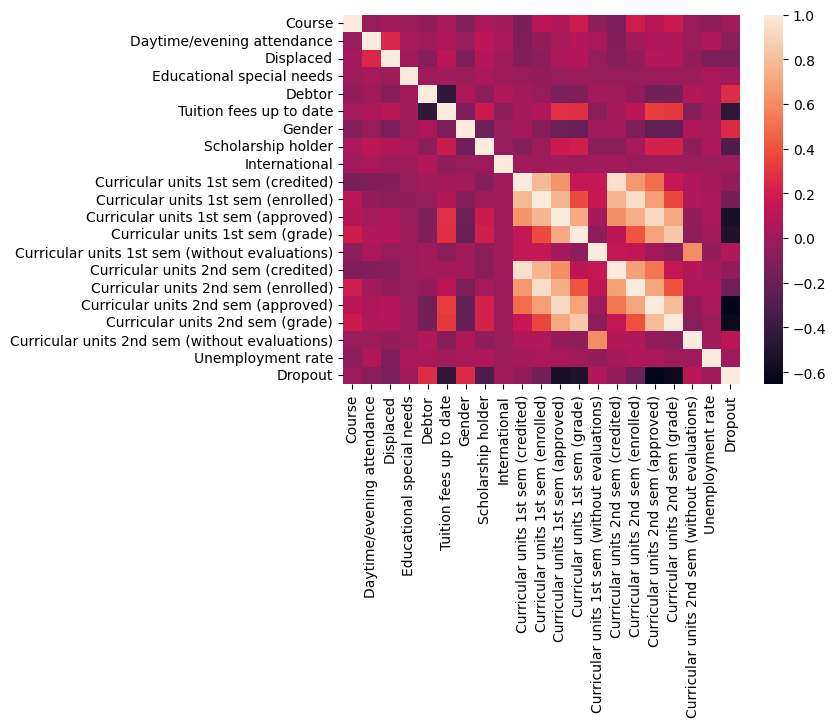

In [11]:
sns.heatmap(corr_matrix)

In [12]:
X=df3.drop('Dropout',axis=1)
y=df3['Dropout']

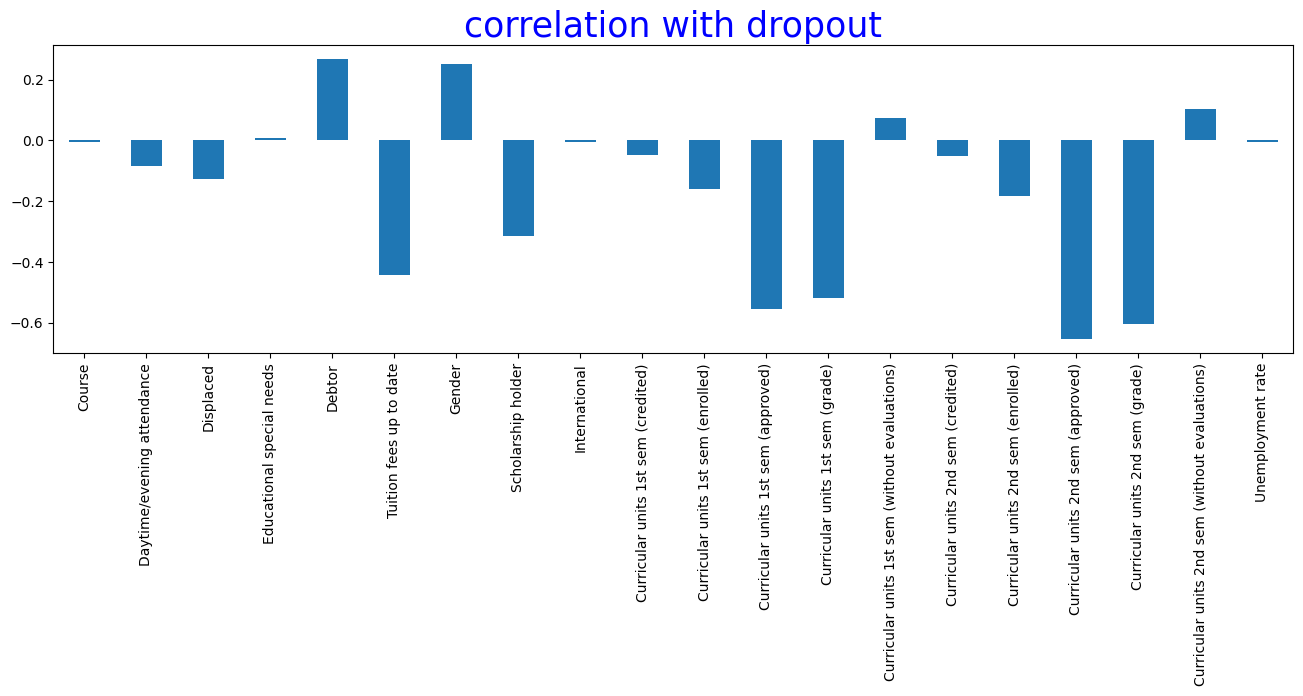

In [13]:
X.corrwith(y).plot.bar(figsize=(16,4),rot=90,grid=False)
plt.title('correlation with dropout',
            fontsize=25,color='Blue')
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
model_lr.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9256198347107438

In [16]:
model_svc=SVC()
model_svc.fit(x_train,y_train)
model_svc.score(x_test,y_test)

0.9118457300275482

In [17]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
model_rf.score(x_test,y_test)

0.9297520661157025

In [24]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
model_dt.score(x_test,y_test)

0.8787878787878788

In [18]:
from sklearn.model_selection import cross_val_score

score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X,y,cv=3)
score_svc=cross_val_score(SVC(gamma='auto'),X,y,cv=3)
score_rf=cross_val_score(RandomForestClassifier(n_estimators=30),X,y,cv=3)
score_dt=cross_val_score(DecisionTreeClassifier(),X,y,cv=3)

In [19]:
import numpy as np
np.average(score_lr)

0.9126721763085399

In [20]:
np.average(score_svc)

0.8928374655647383

In [21]:
np.average(score_dt)

0.8548209366391184

In [22]:
np.average(score_rf)

0.9038567493112947

In [23]:
from sklearn.model_selection import GridSearchCV

In [26]:
model_params={
    'svm':{
        'model': SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'Decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'min_samples_leaf': [1, 2, 4]

        }
    }
}

In [28]:
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_parameter':clf.best_params_
    })
df=pd.DataFrame(scores,columns=['model','best_score','best_parameter'])
df.head()

,model,best_score,best_parameter
0,svm,0.910744,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.892562,{'n_estimators': 10}
2,logistic_regression,0.912672,{'C': 1}
3,Decision_tree,0.873554,{'min_samples_leaf': 4}
